In [1]:
from pyspark import SparkSession

In [4]:
spark = SparkSession.builder.master("local[*]") \
                            .appName("Spark_Dataframe_Exercise") \
                            .getOrCreate()

In [8]:
countries_df = spark.read.csv("countries.csv", header=True)

In [31]:
countries_df.dtypes

[('Code', 'string'),
 ('Name', 'string'),
 ('Continent', 'string'),
 ('Region', 'string'),
 ('SurfaceArea', 'string'),
 ('IndepYear', 'string'),
 ('Population', 'string'),
 ('LifeExpectancy', 'string'),
 ('GNP', 'string'),
 ('GNPOld', 'string'),
 ('LocalName', 'string'),
 ('GovernmentForm', 'string'),
 ('HeadOfState', 'string'),
 ('Capital', 'string'),
 ('Code2', 'string')]

In [9]:
countries_df.show()

+----+--------------------+-------------+--------------------+-----------+---------+----------+--------------+--------+--------+--------------------+--------------------+--------------------+-------+-----+
|Code|                Name|    Continent|              Region|SurfaceArea|IndepYear|Population|LifeExpectancy|     GNP|  GNPOld|           LocalName|      GovernmentForm|         HeadOfState|Capital|Code2|
+----+--------------------+-------------+--------------------+-----------+---------+----------+--------------+--------+--------+--------------------+--------------------+--------------------+-------+-----+
| ABW|               Aruba|North America|           Caribbean|      193.0|     null|    103000|          78.4|   828.0|   793.0|               Aruba|Nonmetropolitan T...|             Beatrix|  129.0|   AW|
| AFG|         Afghanistan|         Asia|Southern and Cent...|   652090.0|   1919.0|  22720000|          45.9|  5976.0|    null|Afganistan/Afqane...|     Islamic Emirate|      

In [17]:
countries_df.filter('Region == "Antarctica"').show()

+----+--------------------+----------+----------+-----------+---------+----------+--------------+---+------+--------------------+--------------------+--------------+-------+-----+
|Code|                Name| Continent|    Region|SurfaceArea|IndepYear|Population|LifeExpectancy|GNP|GNPOld|           LocalName|      GovernmentForm|   HeadOfState|Capital|Code2|
+----+--------------------+----------+----------+-----------+---------+----------+--------------+---+------+--------------------+--------------------+--------------+-------+-----+
| ATA|          Antarctica|Antarctica|Antarctica| 13120000.0|     null|         0|          null|0.0|  null|                  Â–|    Co-administrated|          null|   null|   AQ|
| ATF|French Southern t...|Antarctica|Antarctica|     7780.0|     null|         0|          null|0.0|  null|Terres australes ...|Nonmetropolitan T...|Jacques Chirac|   null|   TF|
| BVT|       Bouvet Island|Antarctica|Antarctica|       59.0|     null|         0|          null|0.0

In [15]:
countries_df.select("Code").distinct().count()

239

In [19]:
countries_df.createOrReplaceTempView("countries")

In [24]:
spark.sql('SELECT DISTINCT(GovernmentForm) FROM countries').collect()

[Row(GovernmentForm="People'sRepublic"),
 Row(GovernmentForm='Federation'),
 Row(GovernmentForm='Commonwealth of the US'),
 Row(GovernmentForm='Constitutional Monarchy'),
 Row(GovernmentForm='Overseas Department of France'),
 Row(GovernmentForm='Islamic Emirate'),
 Row(GovernmentForm='Nonmetropolitan Territory of New Zealand'),
 Row(GovernmentForm='Constitutional Monarchy (Emirate)'),
 Row(GovernmentForm='Administrated by the UN'),
 Row(GovernmentForm='Territorial Collectivity of France'),
 Row(GovernmentForm='Emirate Federation'),
 Row(GovernmentForm='Parlementary Monarchy'),
 Row(GovernmentForm='Monarchy (Emirate)'),
 Row(GovernmentForm='Parliamentary Coprincipality'),
 Row(GovernmentForm='Dependent Territory of the UK'),
 Row(GovernmentForm='Islamic Republic'),
 Row(GovernmentForm='Co-administrated'),
 Row(GovernmentForm='Nonmetropolitan Territory of The Netherlands'),
 Row(GovernmentForm='Dependent Territory of Norway'),
 Row(GovernmentForm='Autonomous Area'),
 Row(GovernmentForm='

In [36]:
from pyspark.sql.types import DoubleType
countries_df = countries_df.withColumn("LifeExpectancy", countries_df["LifeExpectancy"].cast(DoubleType()))
countries_df = countries_df.withColumn("GNP", countries_df["GNP"].cast(DoubleType()))
countries_df = countries_df.withColumn("Population", countries_df["Population"].cast(DoubleType()))
countries_df.groupby('Continent').avg().show()

+-------------+--------------------+-------------------+------------------+
|    Continent|     avg(Population)|avg(LifeExpectancy)|          avg(GNP)|
+-------------+--------------------+-------------------+------------------+
|       Europe|1.5871186956521738E7|  75.14772727272728| 206497.0652173913|
|       Africa|1.3525431034482758E7| 52.571929824561394|10006.465517241379|
|North America|1.3053864864864865E7|  72.99189189189188|261854.78918918918|
|   Antarctica|                 0.0|               null|               0.0|
|South America| 2.469857142857143E7|  70.94615384615386|          107991.0|
|      Oceania|   1085755.357142857|             69.715|14991.953571428572|
|         Asia| 7.264756274509804E7|  67.44117647058825|150105.72549019608|
+-------------+--------------------+-------------------+------------------+



In [37]:
pd_countries = countries_df.toPandas()

pd_countries.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,None,103000.0,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000.0,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000.0,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,None,8000.0,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200.0,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL


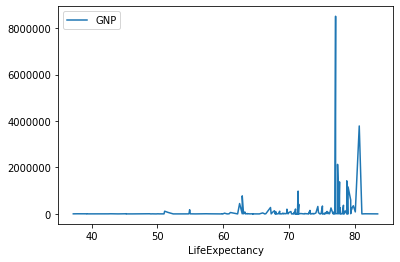

In [39]:
pd_countries.sort_values('LifeExpectancy').plot(x='LifeExpectancy', y='GNP')